# Credit Card Users Churn Prediction

## Problem Statement

There has been a decline in the number of credit card users of a bank. A high portion of the revenue of the bank comes from these customers. It includes annual fees, cash advance fees, interest charges, foreign transaction fees and others. Seeing a decline in the number of users mean a sharp decline in the revenue of the bank.<br><br>
In this project, we are going to:<br>
- Explore the data and find the main variables contributing to the customer churn in this bank.
- Build a machine learning model that can predict if a customer is likely to leave.


# Code

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
df = pd.read_csv("BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
df.shape

(10127, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Exploratory Data Analysis (EDA)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


Insight from above:
- Our customers are 46 years old on average, the youngest customer is 26 years old and the oldest is 73.
- On average, each customer has 2.3 dependants which could go up to 5 dependants for some customers
- The customers are on average 35 months using this bank, ranging from 13 months to 56 month
- Credit limit on average is $8,631 and it is right skewed as the mean is much larger than median

## Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

## Checking for missing values

In [ ]:
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

- As can be seen, the Education_Level and the Marital_Status columns have missing values. Since the missing values are not a small portion, we will impute them. But we will leave it for after the train_test_split to prevent data leakage

## Removing the Client ID column as it has no relation to customer churn

In [ ]:
# CLIENTNUM is unique for each candidate and might not add value to modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

## EDA

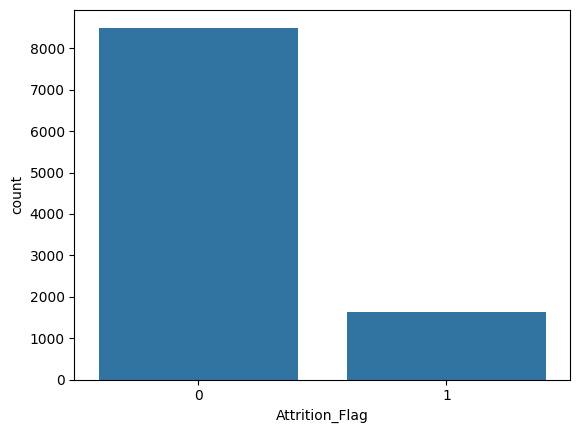

In [ ]:
sns.countplot(data= df,x= 'Attrition_Flag')
plt.show()

- The data set is imbalanced, so we will try oversampling and undersampling at the time of model building

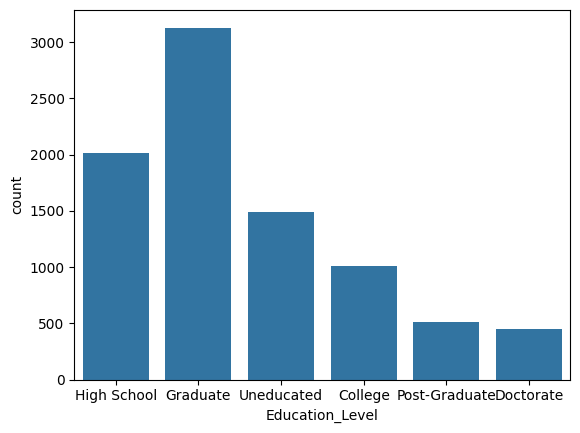

In [ ]:
sns.countplot(data= df,x= 'Education_Level')
plt.show()

- The most common education level in our customers is Graduate, followed by high school

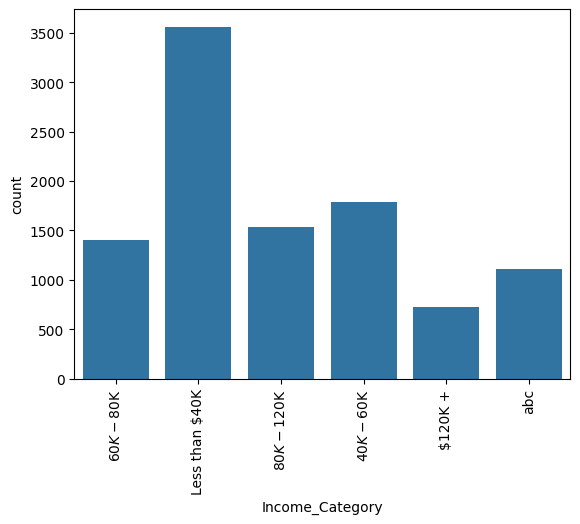

In [ ]:
sns.countplot(data= df,x= 'Income_Category')
plt.xticks(rotation=90)
plt.show()

- The most common income category is 40K or less, and a very small portion of the customers make more than 120K per year.
- There is an undefined category as abc which we will treat in next steps

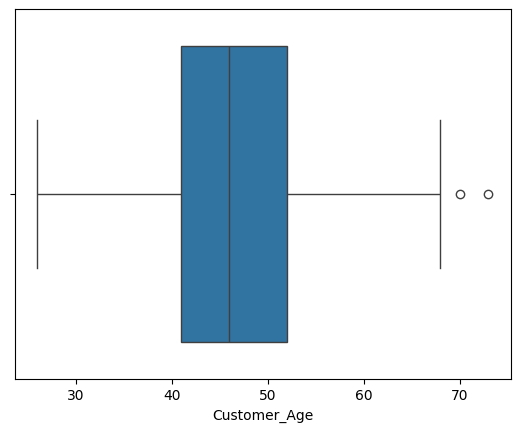

In [ ]:
sns.boxplot(data= df, x= "Customer_Age")
plt.show()

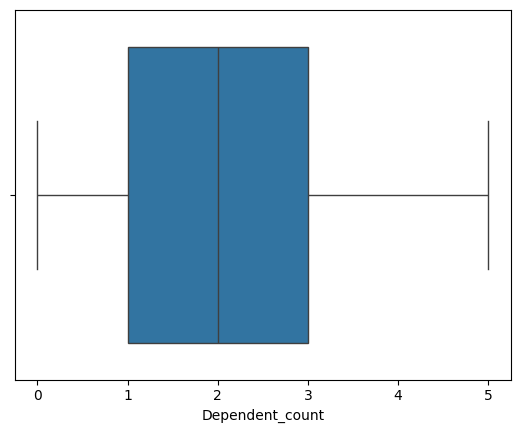

In [ ]:
sns.boxplot(data= df, x= "Dependent_count")
plt.show()

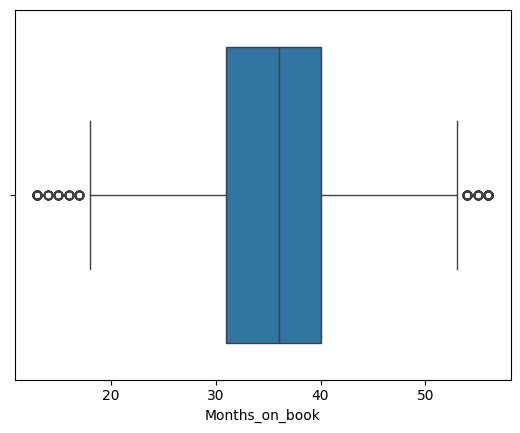

In [ ]:
sns.boxplot(data= df, x= "Months_on_book")
plt.show()

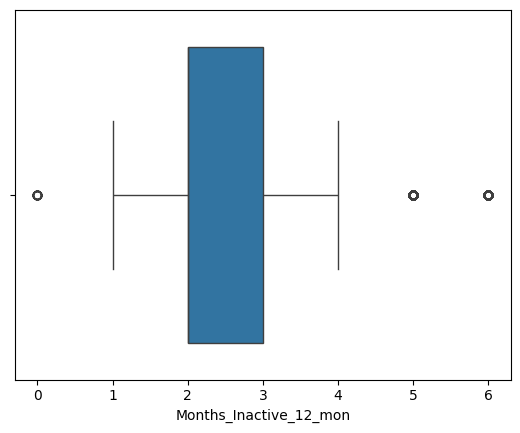

In [ ]:
sns.boxplot(data= df, x= "Months_Inactive_12_mon")
plt.show()

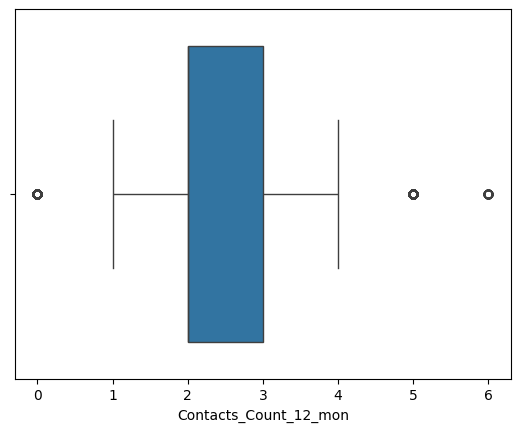

In [ ]:
sns.boxplot(data= df, x= "Contacts_Count_12_mon")
plt.show()

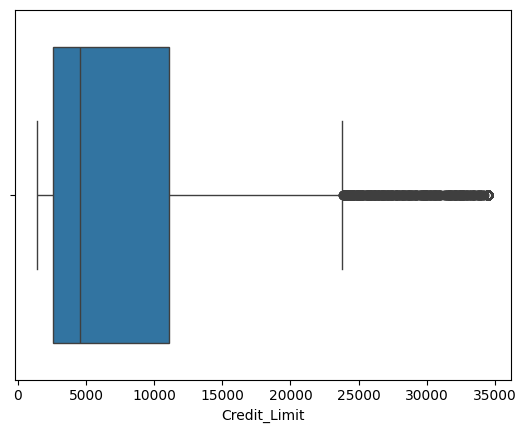

In [ ]:
sns.boxplot(data= df, x= "Credit_Limit")
plt.show()

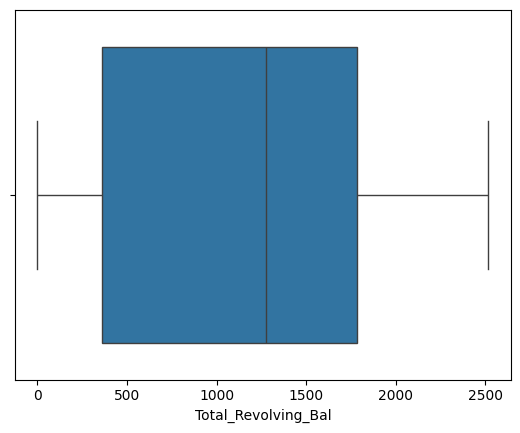

In [ ]:
sns.boxplot(data= df, x= "Total_Revolving_Bal")
plt.show()

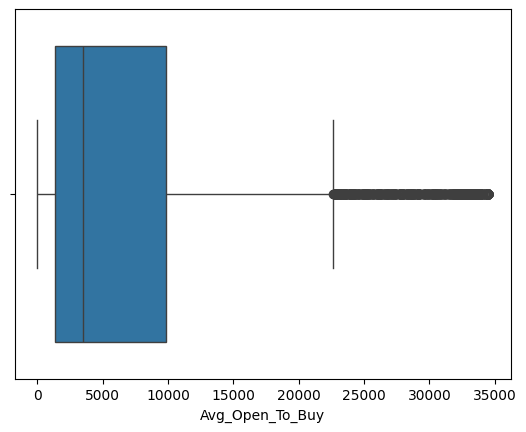

In [ ]:
sns.boxplot(data= df, x= "Avg_Open_To_Buy")
plt.show()

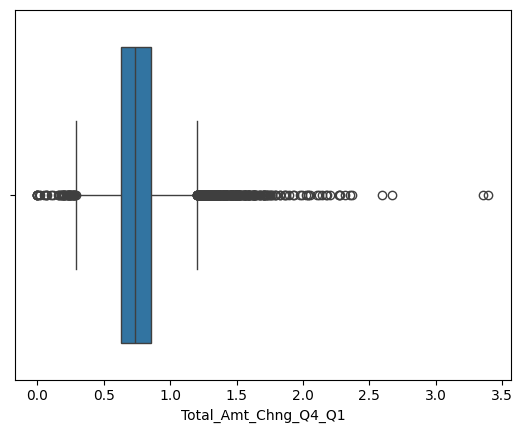

In [ ]:
sns.boxplot(data= df, x= "Total_Amt_Chng_Q4_Q1")
plt.show()

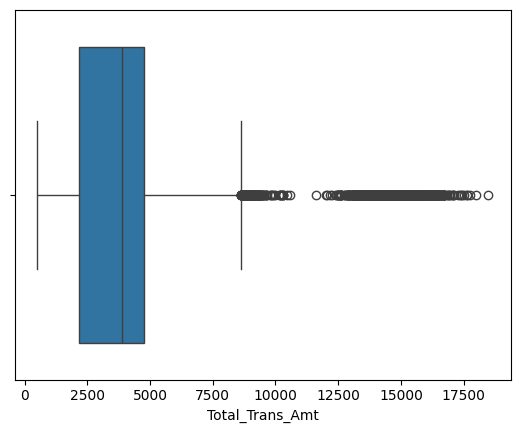

In [ ]:
sns.boxplot(data= df, x= "Total_Trans_Amt")
plt.show()

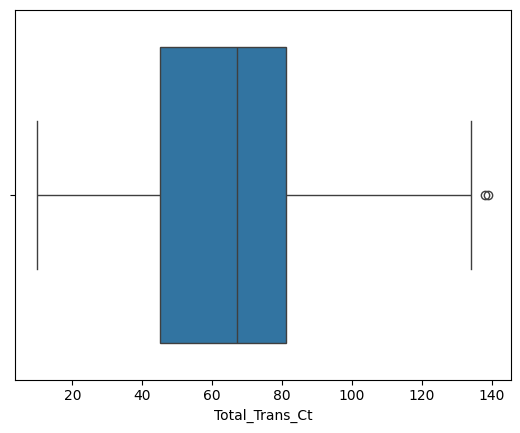

In [ ]:
sns.boxplot(data= df, x= "Total_Trans_Ct")
plt.show()

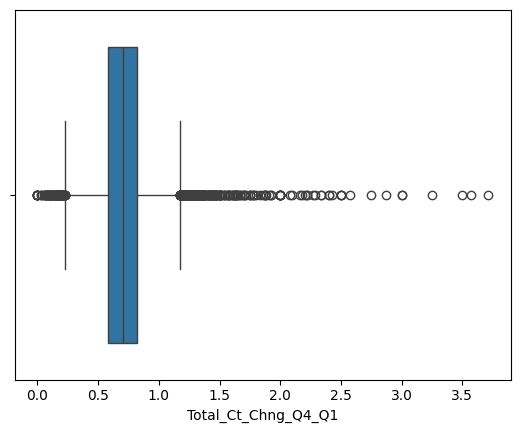

In [ ]:
sns.boxplot(data= df, x= "Total_Ct_Chng_Q4_Q1")
plt.show()

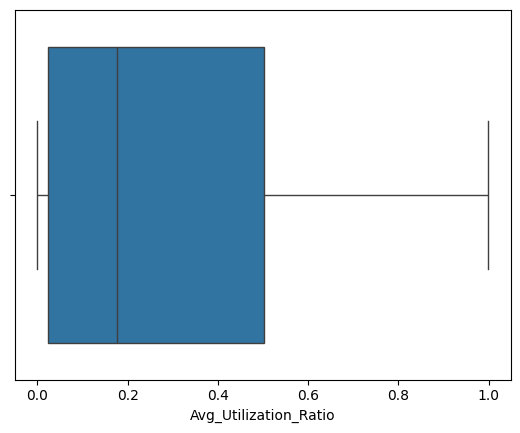

In [ ]:
sns.boxplot(data= df, x= "Avg_Utilization_Ratio")
plt.show()

- Some of the variables have outliers, such as income, but the outliers are valid values and we are not going to treat them

## Bivariate Analysis

In [ ]:
df.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105


In [ ]:
pd.crosstab(df['Education_Level'], df['Attrition_Flag'])

Attrition_Flag,0,1
Education_Level,,
College,859,154
Doctorate,356,95
Graduate,2641,487
High School,1707,306
Post-Graduate,424,92
Uneducated,1250,237


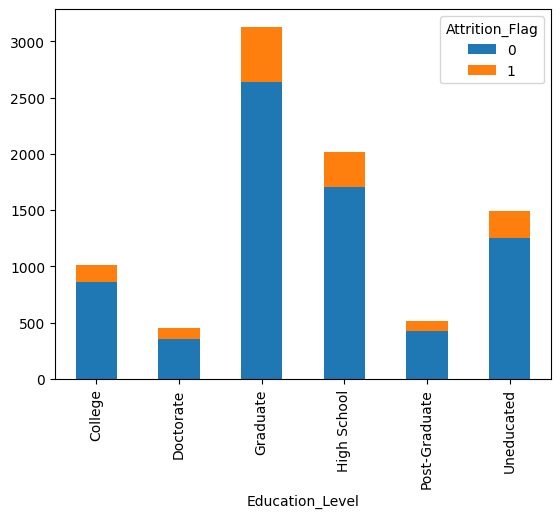

In [ ]:
pd.crosstab(df['Education_Level'], df['Attrition_Flag']).plot(kind='bar', stacked=True)
plt.show()

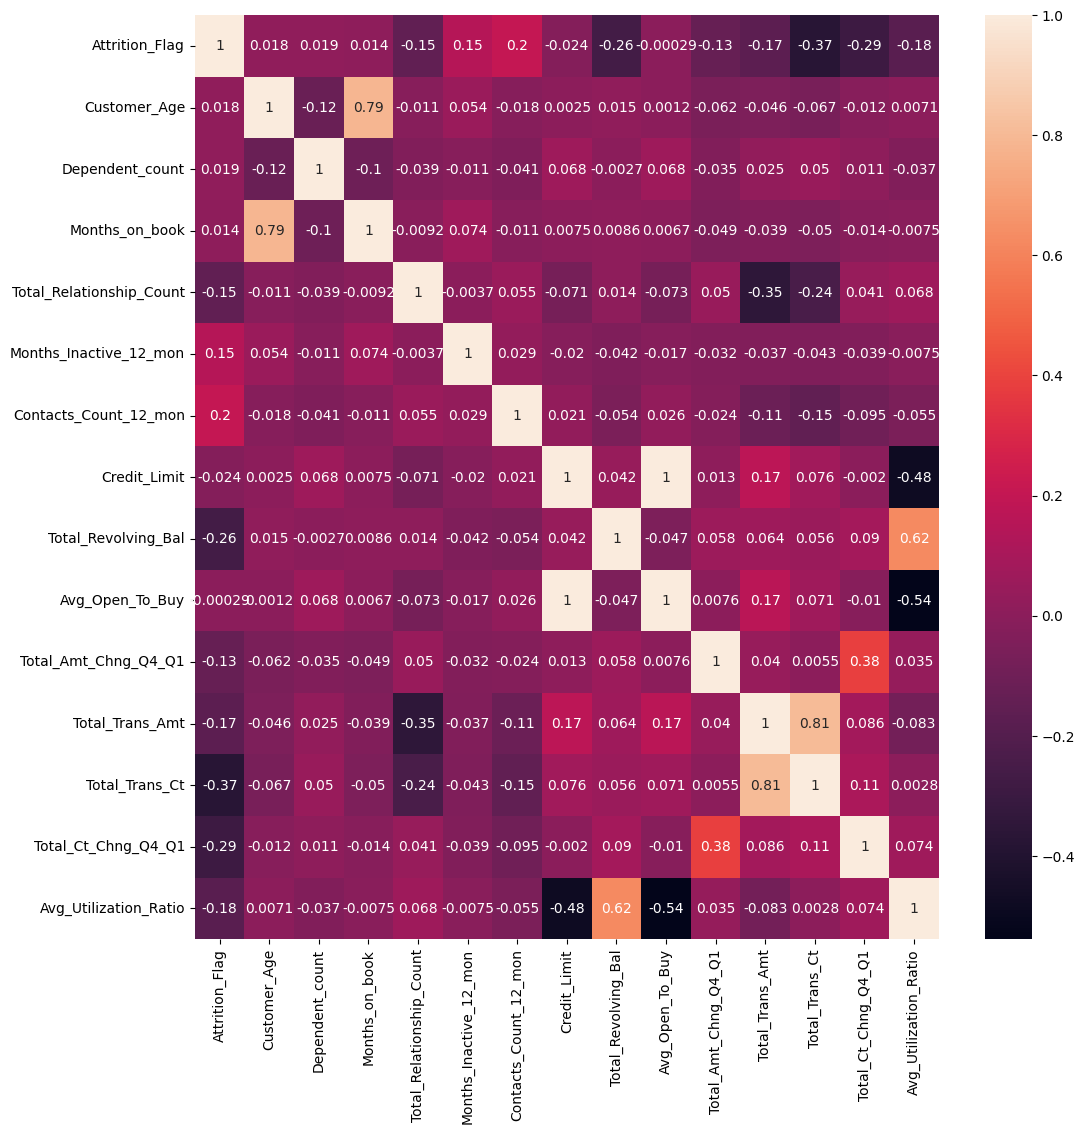

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

**attrition_flag has a positive correlation with contacts_count_12_mon and months_inactive_12_mon.**

**months_on_book has a positive correlation with customer_age. (0.79)**

## Data Preparation for Modeling

In [ ]:
# Converting the classes in the traget variable into 0 and 1
# The positive case is Attrited Customer, so it will be replaced with 1.
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer':1})

In [ ]:
X = df.drop(['Attrition_Flag'], axis = 1)
y = df['Attrition_Flag']

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify= y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


## Missing value imputation

In [ ]:
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Card_Category', 'Income_Category']
num_cols =['Customer_Age','Dependent_count', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon',
           'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct',
           'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [ ]:
# impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# impute numerical columns
num_imputer = SimpleImputer(strategy = 'median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
for i in cat_cols:
    print(df[i].value_counts())
    print('-'*20)

F    5358
M    4769
Name: Gender, dtype: int64
--------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------


In [ ]:
for x in num_cols:
    print(df[x].value_counts())
    print('-'*20)

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64
--------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------
36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13   

## Data Pre-processing

In [ ]:
#creating dummy variables

X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 30) (2026, 30) (2026, 30)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are when the model predicts a customer leaves and they leave.
- True negative (TP) are when the model predicts a customer does not leave and they do not leave.
- False negatives (FN) are when the model says the customer will not leave, but the customer leaves.
- False positives (FP) are when the model predicts the customer will leave but the customer is not leaving

**Which metric to optimize?**

* We want to minimize false negatives because if a model predicts that a a customer will not leave, but if they do, we will lose that customer and that means losing profit.
* So we would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.


## Defining a few functions
Functions to generate the scores and show the confusion matrix in a heatmap

In [ ]:
def cm_heatmap(actual, pred):
  cm = confusion_matrix(actual, pred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot=True, fmt="g")
  plt.xlabel("Predicted Values")
  plt.ylabel("Actual Values")

In [ ]:
def print_scores(actual, pred):
  accuracy = accuracy_score(actual, pred)
  recall = recall_score(actual, pred)
  precision = precision_score(actual, pred)
  f1 = f1_score(actual, pred)
  print('accuracy:', accuracy)
  print('recall:', recall)
  print('precision:', precision)
  print('f1:', f1)

In [ ]:
df['Attrition_Flag'].value_counts(normalize=True)

0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64

## Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=50, random_state=1)
model_rf.fit(X_train, y_train)
prediction = model_rf.predict(X_train)

accuracy: 1.0
recall: 1.0
precision: 1.0
f1: 1.0


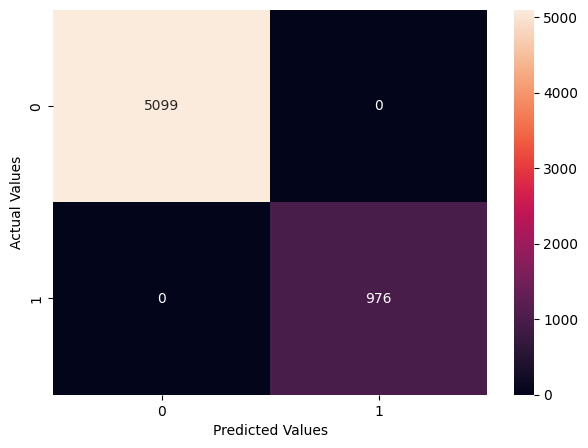

In [ ]:
print_scores(y_train, prediction)
cm_heatmap(y_train, prediction)

- It seems like the random forest model is overfitting

In [ ]:
prediction = model_rf.predict(X_val)

accuracy: 0.9540967423494571
recall: 0.7822085889570553
precision: 0.9205776173285198
f1: 0.845771144278607


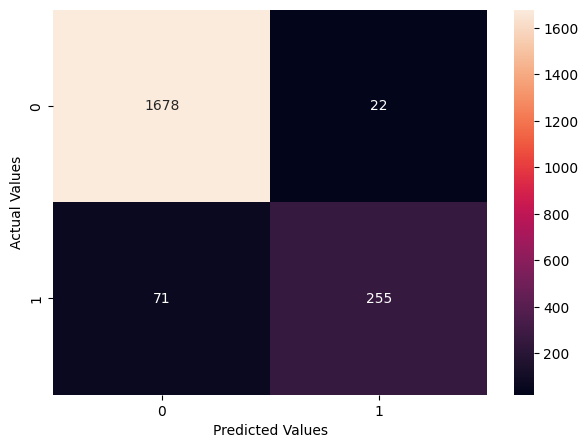

In [ ]:
print_scores(y_val, prediction)
cm_heatmap(y_val, prediction)

## Bagging Classifier

In [ ]:
model_bag = BaggingClassifier(n_estimators=25, random_state=1)
model_bag.fit(X_train, y_train)
prediction = model_bag.predict(X_train)

accuracy: 0.9990123456790123
recall: 0.9959016393442623
precision: 0.997946611909651
f1: 0.9969230769230769


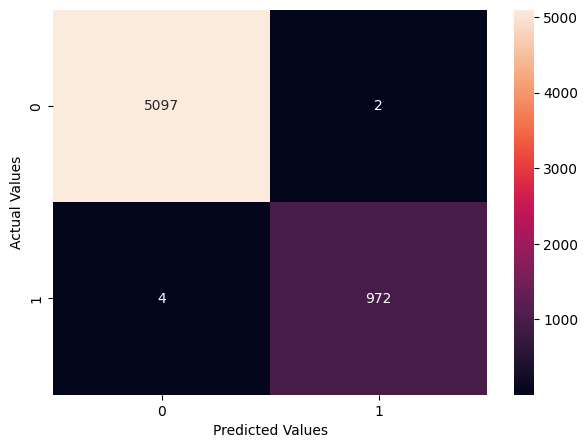

In [ ]:
print_scores(y_train, prediction)
cm_heatmap(y_train, prediction)

In [ ]:
prediction = model_bag.predict(X_val)

accuracy: 0.9624876604146101
recall: 0.8650306748466258
precision: 0.8980891719745223
f1: 0.88125


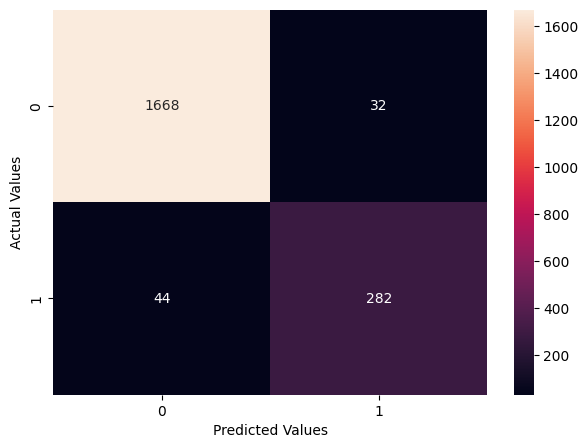

In [ ]:
print_scores(y_val, prediction)
cm_heatmap(y_val, prediction)

## Gradient Boosting Classifier

In [ ]:
model_GB = GradientBoostingClassifier(n_estimators=25, random_state=1)
model_GB.fit(X_train, y_train)
prediction = model_GB.predict(X_train)

accuracy: 0.9433744855967078
recall: 0.7008196721311475
precision: 0.9293478260869565
f1: 0.7990654205607476


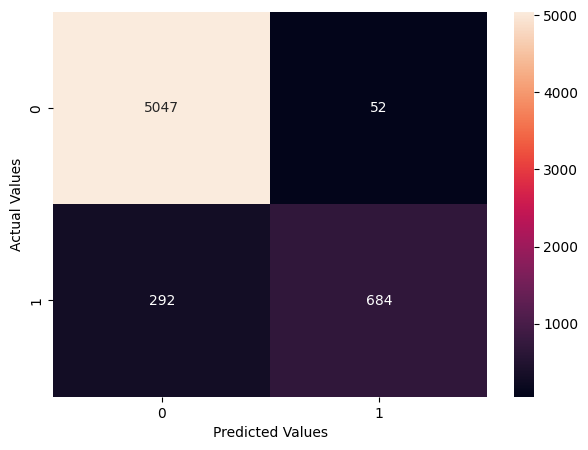

In [ ]:
print_scores(y_train, prediction)
cm_heatmap(y_train, prediction)

In [ ]:
prediction = model_GB.predict(X_val)

accuracy: 0.9481737413622903
recall: 0.7423312883435583
precision: 0.9201520912547528
f1: 0.8217317487266553


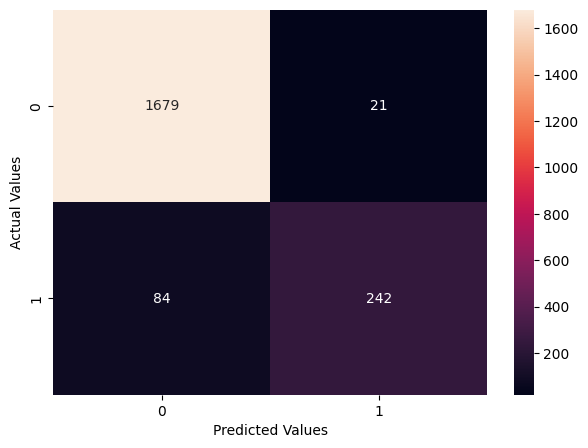

In [ ]:
print_scores(y_val, prediction)
cm_heatmap(y_val, prediction)

## Adaptive Boosting Classifier

In [ ]:
model_adb = AdaBoostClassifier(n_estimators=25, random_state=1)
model_adb.fit(X_train, y_train)
prediction = model_adb.predict(X_train)

accuracy: 0.9502880658436214
recall: 0.7786885245901639
precision: 0.8983451536643026
f1: 0.8342480790340284


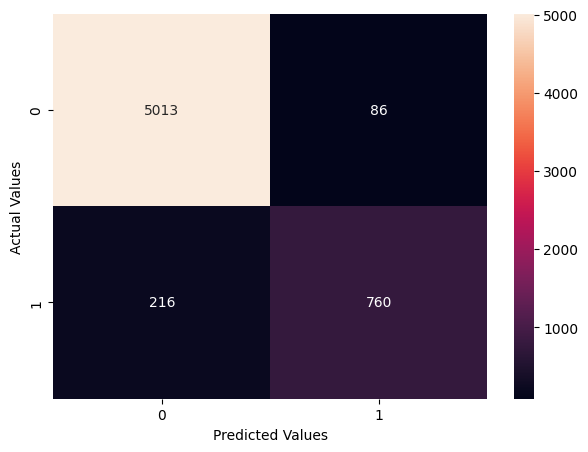

In [ ]:
print_scores(y_train, prediction)
cm_heatmap(y_train, prediction)

In [ ]:
prediction = model_adb.predict(X_val)

accuracy: 0.9511352418558736
recall: 0.7883435582822086
precision: 0.8954703832752613
f1: 0.8384991843393148


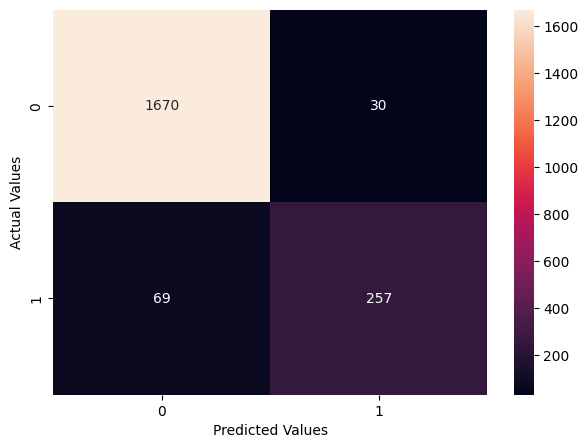

In [ ]:
print_scores(y_val, prediction)
cm_heatmap(y_val, prediction)

### Model Building with oversampling
- Bagging classifier had better results, so we are going to try it using oversampled and undersampled data

In [ ]:
print("Before Oversampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label '1': 976
Before Oversampling, counts of label '0': 5099 

After Oversampling, counts of label '1': 5099
After Oversampling, counts of label '0': 5099 

After Oversampling, the shape of train_X: (10198, 30)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
model_bag = BaggingClassifier(n_estimators=50, random_state=1)
model_bag.fit(X_train_over, y_train_over)
prediction = model_bag.predict(X_train_over)

accuracy: 0.999901941557168
recall: 0.9998038831143361
precision: 1.0
f1: 0.9999019319407668


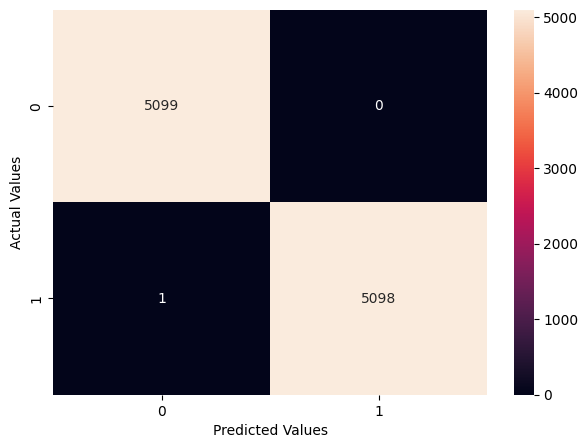

In [ ]:
print_scores(y_train_over, prediction)
cm_heatmap(y_train_over, prediction)

In [ ]:
prediction = model_bag.predict(X_val)

accuracy: 0.9471865745310958
recall: 0.8680981595092024
precision: 0.8155619596541787
f1: 0.8410104011887073


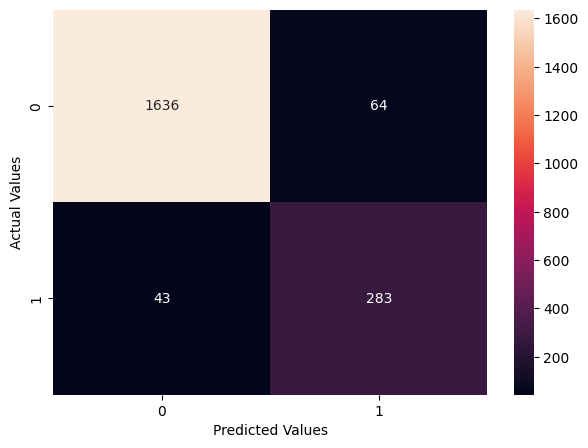

In [ ]:
print_scores(y_val, prediction)
cm_heatmap(y_val, prediction)

**Bagging performed better with x_train_over and y_train_over.**

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 30)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
model_bag = BaggingClassifier(n_estimators=25, random_state=1)
model_bag.fit(X_train_un, y_train_un)
prediction = model_bag.predict(X_train_un)

accuracy: 0.9994877049180327
recall: 0.9989754098360656
precision: 1.0
f1: 0.9994874423372629


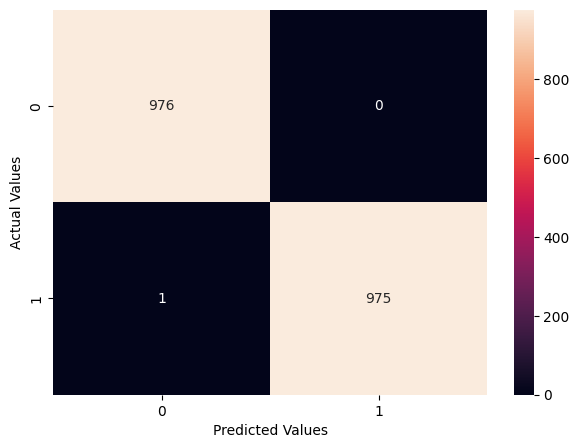

In [ ]:
print_scores(y_train_un, prediction)
cm_heatmap(y_train_un, prediction)

In [ ]:
prediction = model_bag.predict(X_val)

accuracy: 0.9160908193484699
recall: 0.9447852760736196
precision: 0.6695652173913044
f1: 0.7837150127226463


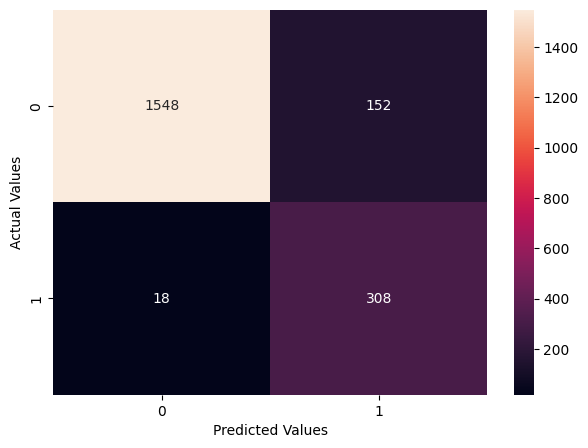

In [ ]:
print_scores(y_val, prediction)
cm_heatmap(y_val, prediction)

### HyperparameterTuning

#### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model_dt = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_dt, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9080249764282552:


In [ ]:
tuned_decisiontree = DecisionTreeClassifier(min_samples_leaf=1, min_impurity_decrease=0.0001, max_leaf_nodes=15, max_depth=4)
tuned_decisiontree.fit(X_train_over,y_train_over)
prediction = tuned_decisiontree.predict(X_train_over)

accuracy: 0.9178270249068444
recall: 0.9099823494802902
precision: 0.9244869495915521
f1: 0.9171773077683336


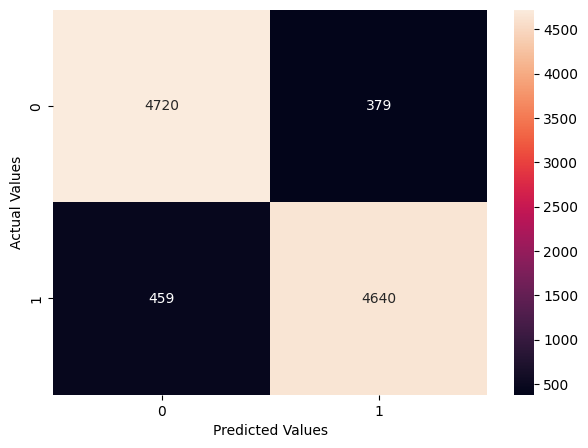

In [ ]:
print_scores(y_train_over, prediction)
cm_heatmap(y_train_over, prediction)

In [ ]:
prediction = tuned_decisiontree.predict(X_val)

accuracy: 0.9116485686080947
recall: 0.8558282208588958
precision: 0.6788321167883211
f1: 0.7571234735413839


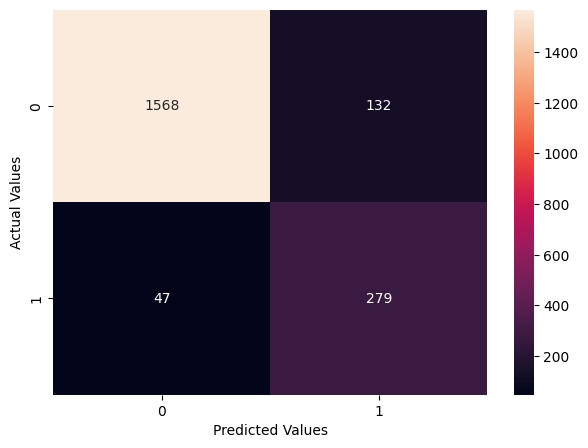

In [ ]:
print_scores(y_val, prediction)
cm_heatmap(y_val, prediction)

#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model_dt = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_dt, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8995761381475667:


In [ ]:
tuned_decisiontree = DecisionTreeClassifier(min_samples_leaf=1, min_impurity_decrease=0.0001, max_leaf_nodes=15, max_depth=5)
tuned_decisiontree.fit(X_train_un,y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001)

In [ ]:
prediction = tuned_decisiontree.predict(X_train_un)

accuracy: 0.9170081967213115
recall: 0.9293032786885246
precision: 0.907
f1: 0.9180161943319838


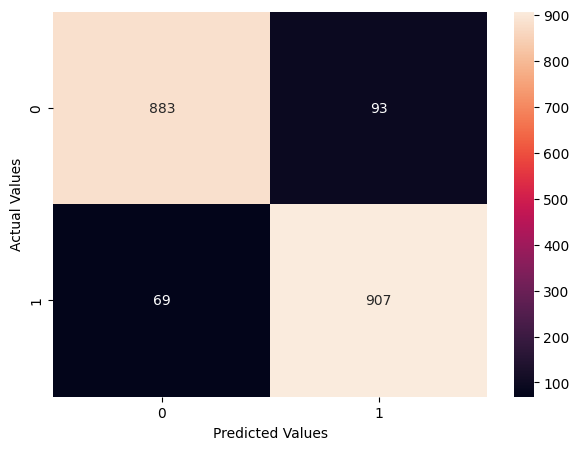

In [ ]:
print_scores(y_train_un, prediction)
cm_heatmap(y_train_un, prediction)

In [ ]:
prediction = tuned_decisiontree.predict(X_val)

accuracy: 0.8849950641658441
recall: 0.9141104294478528
precision: 0.5924453280318092
f1: 0.7189384800965019


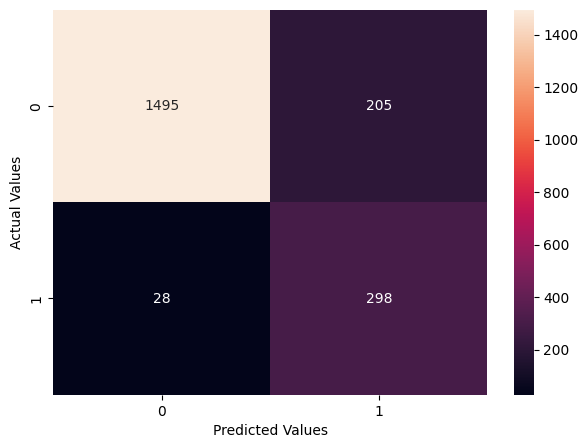

In [ ]:
print_scores(y_val, prediction)
cm_heatmap(y_val, prediction)

## Hyper parameter tuning

In [ ]:
# defining model
Model_bag = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {    'max_samples': [0.8,0.9,1],
                  'max_features': [0.7,0.8,0.9],
                  'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_bag, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:


In [ ]:
tuned_bagging = BaggingClassifier(n_estimators=30, max_samples=1, max_features=0.7)
tuned_bagging.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30)

In [ ]:
prediction = tuned_bagging.predict(X_train_un)

accuracy: 0.5
recall: 0.0
precision: 0.0
f1: 0.0


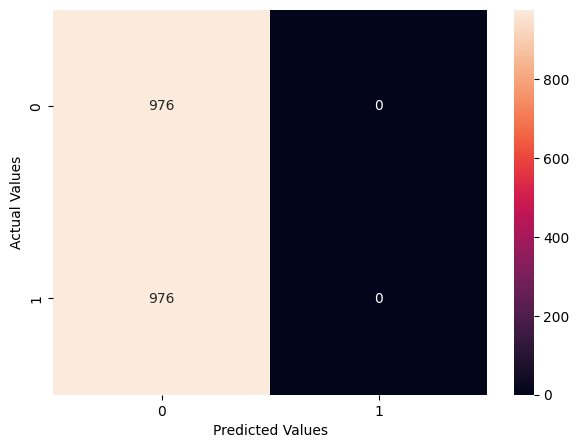

In [ ]:
print_scores(y_train_un, prediction)
cm_heatmap(y_train_un, prediction)

In [ ]:
prediction = tuned_bagging.predict(X_val)

accuracy: 0.8390918065153011
recall: 0.0
precision: 0.0
f1: 0.0


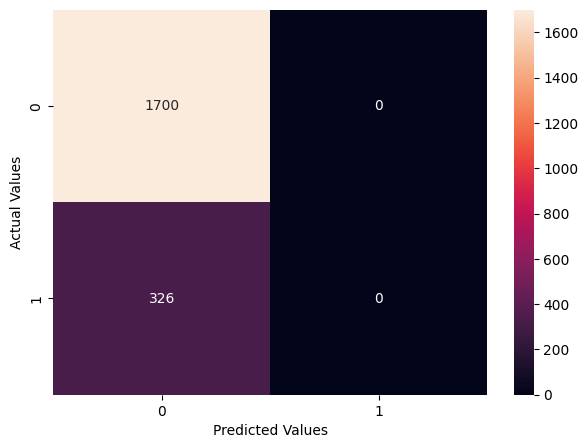

In [ ]:
print_scores(y_val, prediction)
cm_heatmap(y_val, prediction)

Sample tuning method for Random Forest with original data

In [ ]:
# defining model
Model_rf = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid =  {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_rf, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 25, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.7295028780743067:


In [ ]:
tuned_rf = RandomForestClassifier(n_estimators=25, min_samples_leaf=1, max_samples=0.5, max_features='sqrt')
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.5, n_estimators=25)

In [ ]:
prediction = tuned_rf.predict(X_train)

accuracy: 0.9904526748971193
recall: 0.9528688524590164
precision: 0.9872611464968153
f1: 0.969760166840459


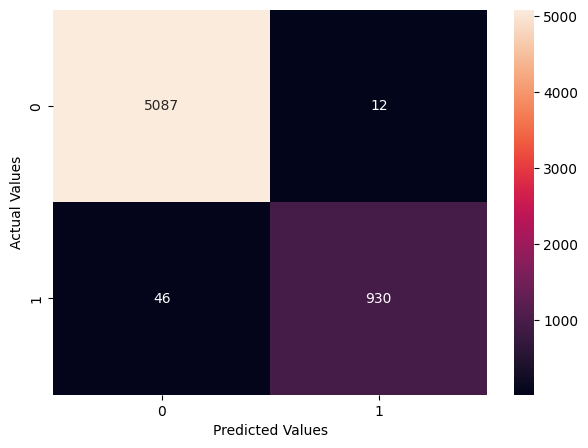

In [ ]:
print_scores(y_train, prediction)
cm_heatmap(y_train, prediction)

In [ ]:
prediction = tuned_rf.predict(X_val)

accuracy: 0.9536031589338598
recall: 0.7883435582822086
precision: 0.9113475177304965
f1: 0.8453947368421053


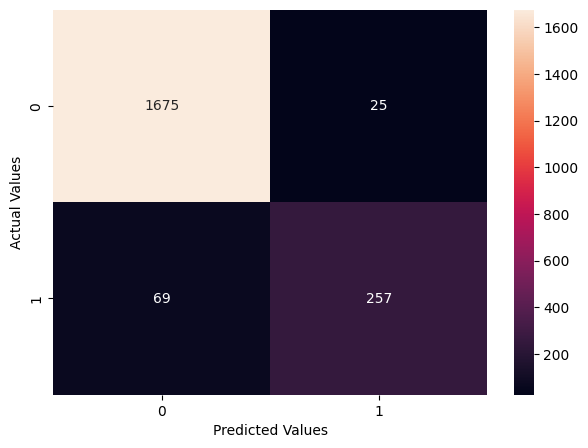

In [ ]:
print_scores(y_val, prediction)
cm_heatmap(y_val, prediction)